In [225]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python ..

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [226]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")

In [227]:
df = df.sort_values("Earnings_1974")


In [228]:
display(pd.concat([df.head(10),
                   df.tail(10)]))

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.00,2323.8390,2625.9200
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.0000,0.0000
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.00,483.3871,5334.5930
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.00,1079.5650,7248.2490
13927,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.0000,0.0000
2483,53,LessThanHighSchool,black,NotHispanic,Married,1,0.00,0.0000,0.0000
9186,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.00,4040.7580,9713.0970
11021,26,HighSchool,black,NotHispanic,NotMarried,0,0.00,1448.3710,0.0000
9192,23,Intermediate,NotBlack,NotHispanic,NotMarried,0,0.00,601.5484,23018.5500
2491,31,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.0000,591.0906


In [229]:
df = df.round({"Earnings_1974":2,"Earnings_1975":2, "Earnings_1978":2})

In [230]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.84,2625.92
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.00,0.00
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.39,5334.59
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.56,7248.25
13927,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.00,0.00


In [231]:
df2 = df.drop_duplicates()

In [232]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13990 entries, 5834 to 3535
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            13990 non-null  int64  
 1   Eduacation     13990 non-null  object 
 2   Race           13990 non-null  object 
 3   Hisp           13990 non-null  object 
 4   MaritalStatus  13990 non-null  object 
 5   Nodeg          13990 non-null  int64  
 6   Earnings_1974  13990 non-null  float64
 7   Earnings_1975  13990 non-null  float64
 8   Earnings_1978  13990 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [233]:
df= df.drop_duplicates(subset=['Earnings_1974','Earnings_1975','Earnings_1978'])

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13121 entries, 5834 to 3535
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            13121 non-null  int64  
 1   Eduacation     13121 non-null  object 
 2   Race           13121 non-null  object 
 3   Hisp           13121 non-null  object 
 4   MaritalStatus  13121 non-null  object 
 5   Nodeg          13121 non-null  int64  
 6   Earnings_1974  13121 non-null  float64
 7   Earnings_1975  13121 non-null  float64
 8   Earnings_1978  13121 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.0+ MB


In [235]:
df = df.round(2)

In [236]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.84,2625.92
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.00,0.00
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.39,5334.59
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.56,7248.25
9186,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,4040.76,9713.10


In [237]:
dups_values = df.pivot_table(columns=['Earnings_1978','Earnings_1974', 'Earnings_1975'], aggfunc='size')  #https://datatofish.com/count-duplicates-pandas/
print (dups_values)

Earnings_1978  Earnings_1974  Earnings_1975
0.00           0.00           0.00             1
                              10.74            1
                              14.32            1
                              21.48            1
                              25.06            1
                                              ..
25564.67       25862.32       25222.06         1
                              25232.81         1
                              25239.97         1
                              25241.76         1
                              25243.55         1
Length: 13121, dtype: int64


In [238]:
df_real = df[((df['Earnings_1974']!=25862.32) & (df['Earnings_1975']!=25243.55) & (df['Earnings_1978']!=25564.67))]

In [239]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 5834 to 742
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            9998 non-null   int64  
 1   Eduacation     9998 non-null   object 
 2   Race           9998 non-null   object 
 3   Hisp           9998 non-null   object 
 4   MaritalStatus  9998 non-null   object 
 5   Nodeg          9998 non-null   int64  
 6   Earnings_1974  9998 non-null   float64
 7   Earnings_1975  9998 non-null   float64
 8   Earnings_1978  9998 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 781.1+ KB


In [240]:
df_real.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,30.750750,0.358672,10467.877737,10243.369674,11650.274858
std,11.064629,0.479635,7779.671566,7486.619097,7974.564223
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,2864.450000,3002.817500,4170.510000
50%,28.000000,0.000000,10444.850000,10253.180000,12220.800000
75%,39.000000,1.000000,17197.462500,16677.752500,18520.350000
max,55.000000,1.000000,25860.360000,25241.760000,25555.800000


In [241]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,13121.000000,13121.000000,13121.000000,13121.000000,13121.000000
mean,31.937429,0.322232,13011.609867,12682.138238,14271.210635
std,10.959869,0.467349,8749.490339,8440.649578,8988.273900
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,4659.140000,4633.350000,6283.290000
50%,29.000000,0.000000,13650.210000,13269.870000,15233.880000
75%,40.000000,1.000000,20844.640000,20137.550000,22856.000000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [242]:
df_real = df_real[((df_real['Earnings_1974']>0) & (df_real['Earnings_1975']>0)&  (df_real['Earnings_1978']>0))]
    
 

In [243]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7556 entries, 3555 to 742
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            7556 non-null   int64  
 1   Eduacation     7556 non-null   object 
 2   Race           7556 non-null   object 
 3   Hisp           7556 non-null   object 
 4   MaritalStatus  7556 non-null   object 
 5   Nodeg          7556 non-null   int64  
 6   Earnings_1974  7556 non-null   float64
 7   Earnings_1975  7556 non-null   float64
 8   Earnings_1978  7556 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 590.3+ KB


In [244]:
df_real.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,7556.000000,7556.000000,7556.000000,7556.000000,7556.000000
mean,31.515484,0.336818,12364.869817,12177.667087,14007.814592
std,10.837706,0.472654,7108.905370,6781.628600,6974.494800
min,16.000000,0.000000,11.760000,10.740000,2.960000
25%,23.000000,0.000000,6177.570000,6398.610000,8591.130000
50%,29.000000,0.000000,12832.220000,12654.895000,14754.360000
75%,39.000000,1.000000,18336.780000,17801.627500,19898.327500
max,55.000000,1.000000,25860.360000,25241.760000,25555.800000


In [245]:
df_real.head(50)

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
3555,31,PostGraduate,NotBlack,NotHispanic,NotMarried,0,11.76,8498.66,17348.51
1699,23,Intermediate,NotBlack,NotHispanic,Married,0,11.76,2968.36,12832.58
7057,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,17.63,186.19,9223.97
3822,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,19.59,1092.10,18609.01
2502,18,HighSchool,NotBlack,NotHispanic,NotMarried,0,19.59,7834.45,12810.41
9527,18,HighSchool,NotBlack,NotHispanic,NotMarried,0,21.55,4837.45,13445.83
14845,39,HighSchool,NotBlack,NotHispanic,Married,0,29.39,196.94,6855.17
13441,19,HighSchool,black,NotHispanic,NotMarried,0,31.35,3224.37,10757.85
2620,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,31.35,21.48,6868.47
578,20,Intermediate,NotBlack,NotHispanic,Married,0,33.31,1312.31,12299.12


In [246]:
df_o = df2[['Earnings_1974','Earnings_1975','Earnings_1978']]

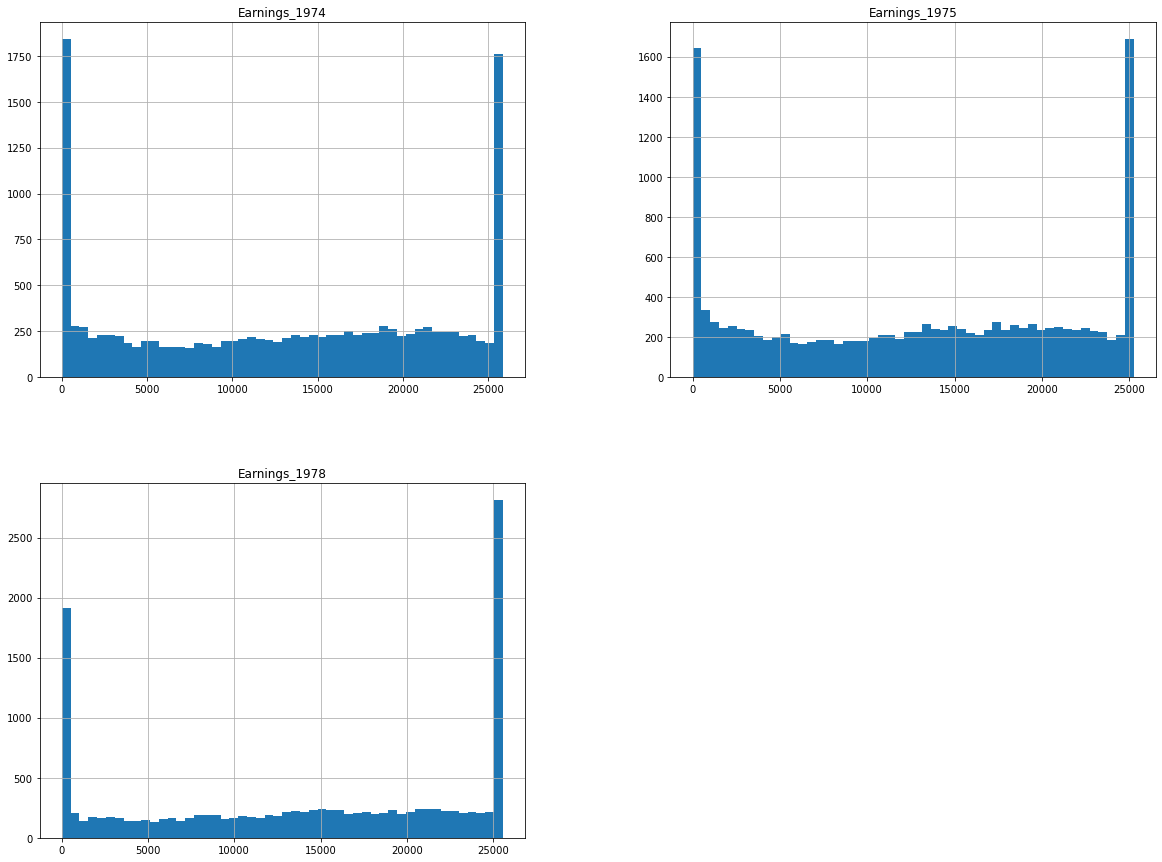

In [247]:
%matplotlib inline

import matplotlib.pyplot as plt
df_o.hist(bins=50, figsize=(20,15))
plt.show()

In [248]:
df_d = df_o[(df_o["Earnings_1974"]!=0)  | (df_o['Earnings_1974']>24000)] 

In [249]:
df_d = df_o[(df_o["Earnings_1974"]!=0)  & (df_o['Earnings_1974']<24000) & (df_o["Earnings_1975"]!=0)  & (df_o['Earnings_1975']<24000) 
                                  & (df_o["Earnings_1978"]!=0)  & (df_o['Earnings_1978']<24000) ] 

# Domain Knowledge

# Judgement call

In [250]:
df_o.head()

,Earnings_1974,Earnings_1975,Earnings_1978
5834,0.0,2323.84,2625.92
13932,0.0,0.00,0.00
8030,0.0,483.39,5334.59
5788,0.0,1079.56,7248.25
13927,0.0,0.00,0.00


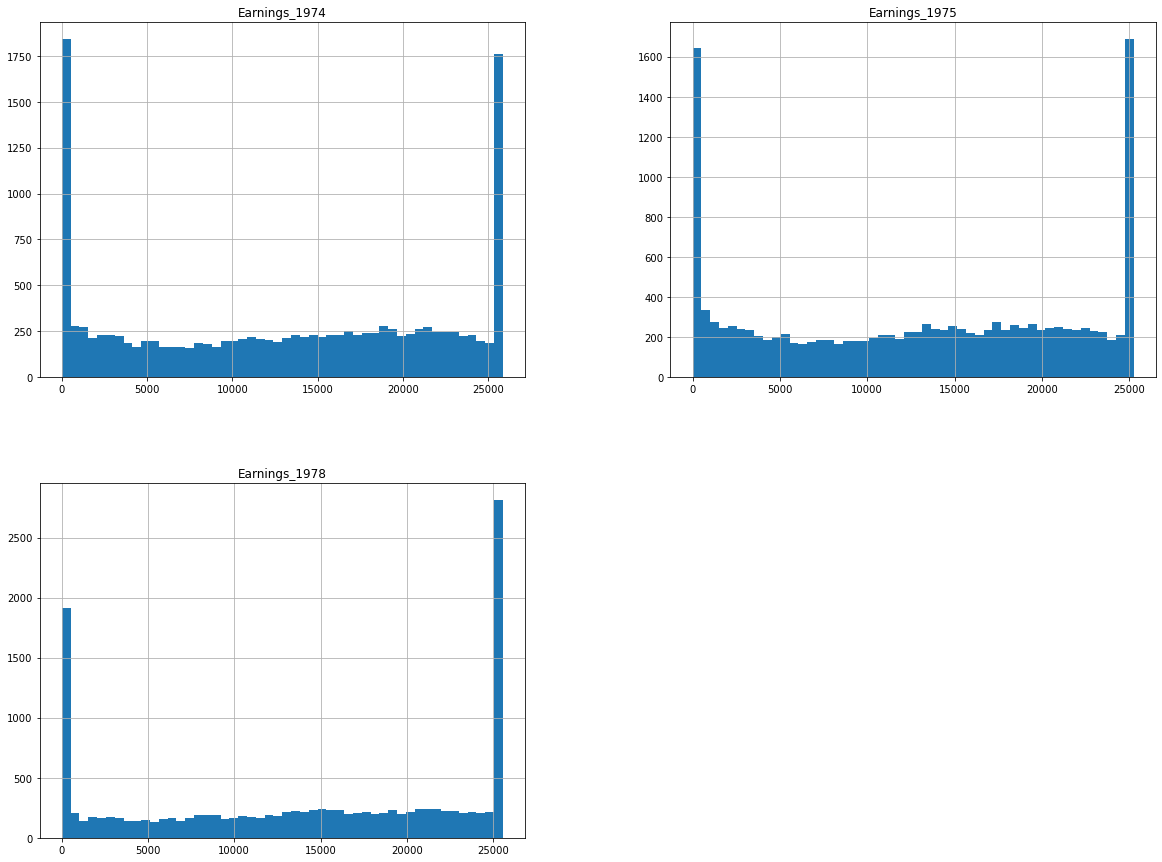

In [251]:
import matplotlib.pyplot as plt
df_o.hist(bins=50, figsize=(20,15))
plt.show()

In [252]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6916 entries, 3555 to 792
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Earnings_1974  6916 non-null   float64
 1   Earnings_1975  6916 non-null   float64
 2   Earnings_1978  6916 non-null   float64
dtypes: float64(3)
memory usage: 216.1 KB


# Counting the value of a column

In [253]:


len(df_d[df_d['Earnings_1974']<=300]) # counting the number that is less than 300


121

In [254]:
len(df_d[(df_d['Earnings_1974']<=300) | (df_d['Earnings_1975']<=300 ) | (df_d['Earnings_1978']<=300)])

264

In [255]:
df.value_counts('Race')

Race
NotBlack    12089
black        1032
dtype: int64

In [256]:
df.value_counts('Hisp')

Hisp
NotHispanic    12083
hispanic        1038
dtype: int64

In [257]:
df_real['racial'] = ''

In [258]:
df_real.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
3555,31,PostGraduate,NotBlack,NotHispanic,NotMarried,0,11.76,8498.66,17348.51,
1699,23,Intermediate,NotBlack,NotHispanic,Married,0,11.76,2968.36,12832.58,
7057,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,17.63,186.19,9223.97,
3822,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,19.59,1092.10,18609.01,
2502,18,HighSchool,NotBlack,NotHispanic,NotMarried,0,19.59,7834.45,12810.41,


In [259]:
df_real.loc[((df_real['Hisp'] =="NotHispanic") & (df_real['Race']=='NotBlack')), 'racial'] = "NotBlackNotHispanic"

In [260]:
df_real.loc[((df_real['Hisp'] =="hispanic") & (df_real['Race']=='NotBlack')), 'racial'] = "hispanic"

In [261]:
df_real.loc[(df_real['Race']=='black'), 'racial'] = "black"

In [262]:
df_real.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,racial
3555,31,PostGraduate,NotBlack,NotHispanic,NotMarried,0,11.76,8498.66,17348.51,NotBlackNotHispanic
1699,23,Intermediate,NotBlack,NotHispanic,Married,0,11.76,2968.36,12832.58,NotBlackNotHispanic
7057,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,17.63,186.19,9223.97,NotBlackNotHispanic
3822,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,19.59,1092.10,18609.01,NotBlackNotHispanic
2502,18,HighSchool,NotBlack,NotHispanic,NotMarried,0,19.59,7834.45,12810.41,NotBlackNotHispanic


In [361]:
df_real.value_counts('racial')

racial
NotBlackNotHispanic    6258
black                   649
hispanic                649
dtype: int64

In [264]:
df_racialgroup = df_real.groupby("racial")
type(df_racialgroup)

pandas.core.groupby.generic.DataFrameGroupBy

In [265]:
df_racialgroup.last()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
racial,,,,,,,,,
NotBlackNotHispanic,55,HighSchool,NotBlack,NotHispanic,Married,0,25860.36,5295.77,5646.39
black,55,LessThanHighSchool,black,NotHispanic,NotMarried,1,25640.92,24264.24,1260.50
hispanic,40,HighSchool,NotBlack,hispanic,Married,0,25793.75,20230.65,10552.45


In [266]:
df_racialgroup.Age.max()

racial
NotBlackNotHispanic    55
black                  55
hispanic               55
Name: Age, dtype: int64

In [267]:
df_racialgroup.Earnings_1978.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
racial,,,,,
NotBlackNotHispanic,25555.80,4.43,6258,14979.71,14215.115561
black,25529.20,2.96,649,13286.24,12681.553359
hispanic,25505.56,93.10,649,13658.63,13335.170647


In [268]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,13121.000000,13121.000000,13121.000000,13121.000000,13121.000000
mean,31.937429,0.322232,13011.609867,12682.138238,14271.210635
std,10.959869,0.467349,8749.490339,8440.649578,8988.273900
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,4659.140000,4633.350000,6283.290000
50%,29.000000,0.000000,13650.210000,13269.870000,15233.880000
75%,40.000000,1.000000,20844.640000,20137.550000,22856.000000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [269]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,13121.0,NaN,NaN,NaN,31.937429,10.959869,16.0,23.0,29.0,40.0,55.0
Eduacation,13121,5,HighSchool,5083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,13121,2,NotBlack,12089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hisp,13121,2,NotHispanic,12083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,13121,2,Married,8893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nodeg,13121.0,NaN,NaN,NaN,0.322232,0.467349,0.0,0.0,0.0,1.0,1.0
Earnings_1974,13121.0,NaN,NaN,NaN,13011.609867,8749.490339,0.0,4659.14,13650.21,20844.64,25862.32
Earnings_1975,13121.0,NaN,NaN,NaN,12682.138238,8440.649578,0.0,4633.35,13269.87,20137.55,25243.55
Earnings_1978,13121.0,NaN,NaN,NaN,14271.210635,8988.2739,0.0,6283.29,15233.88,22856.0,25564.67


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13121 entries, 5834 to 3535
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            13121 non-null  int64  
 1   Eduacation     13121 non-null  object 
 2   Race           13121 non-null  object 
 3   Hisp           13121 non-null  object 
 4   MaritalStatus  13121 non-null  object 
 5   Nodeg          13121 non-null  int64  
 6   Earnings_1974  13121 non-null  float64
 7   Earnings_1975  13121 non-null  float64
 8   Earnings_1978  13121 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.0+ MB


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

In [271]:
agehist = thinkstats2.Hist(df['Age'], label='Age')

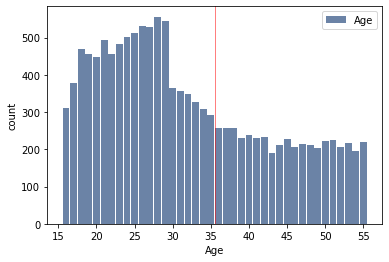

In [272]:
thinkplot.Hist(agehist)
thinkplot.Config(xlabel='Age', ylabel='count')
thinkplot.axvline(np.mean(agehist), color="red")


In [273]:
dfpmf = thinkstats2.Pmf(df["Age"])

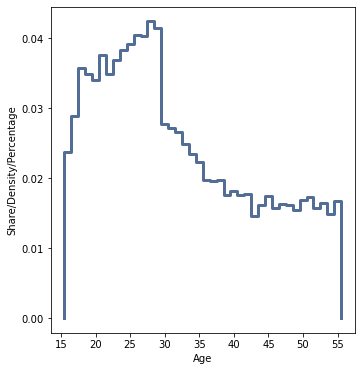

<Figure size 576x432 with 0 Axes>

In [274]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([dfpmf])
#thinkplot.Show(xlabel="Age", ylabel = "Percentage")
thinkplot.Show(xlabel="Age", ylabel = "Share/Density/Percentage")

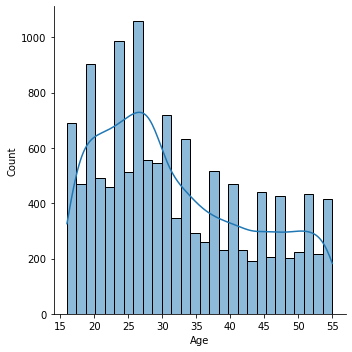

In [275]:
sns.displot(df["Age"], kde=True)

In [276]:
df2 = df[df['Race']=="black"]

df2["Earnings_1978"].describe()


count     1032.000000
mean     11997.540291
std       8767.174084
min          0.000000
25%       3514.035000
50%      12214.150000
75%      19578.767500
max      25564.670000
Name: Earnings_1978, dtype: float64

In [277]:
df3 = df2[["Earnings_1978", "Age"]]

In [278]:
df3.head()

,Earnings_1978,Age
11021,0.00,26
13922,964.96,39
8042,5495.66,20
2593,54.68,17
2597,0.00,28


In [279]:
out = df3[(df3["Age"]<=20) & (df["Earnings_1978"]>20000)]

C:\Users\toluw\AppData\Local\Temp\ipykernel_18364\639177775.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out = df3[(df3["Age"]<=20) & (df["Earnings_1978"]>20000)]


In [280]:
df[(df["Age"]>18) & (df["Age"]<=20) & (df["Earnings_1978"]>=24000)].sort_values("Earnings_1978")

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
8978,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,10352.77,9780.53,24206.64
14839,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,13812.83,16650.00,24474.11
6030,20,LessThanHighSchool,NotBlack,NotHispanic,Married,1,14308.53,20576.18,24511.05
8707,20,HighSchool,NotBlack,NotHispanic,Married,0,12660.78,5682.48,24558.34
522,20,Intermediate,NotBlack,NotHispanic,Married,0,12384.53,13987.79,24576.07
2188,20,Intermediate,NotBlack,NotHispanic,NotMarried,0,3779.43,4633.35,24883.44
12595,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,14332.04,13200.05,24884.92
12176,19,HighSchool,black,NotHispanic,NotMarried,0,2241.40,6629.56,24935.16
13606,20,HighSchool,NotBlack,NotHispanic,NotMarried,0,8799.07,15207.00,24942.55
12713,19,HighSchool,NotBlack,NotHispanic,Married,0,11773.23,24550.69,25009.04


In [281]:
out.value_counts()

Earnings_1978  Age
20243.38       18     1
24935.16       19     1
25303.11       20     1
25564.67       18     1
               19     1
               20     1
dtype: int64

In [282]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 3101 to 6558
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Earnings_1978  6 non-null      float64
 1   Age            6 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 144.0 bytes


In [283]:
df3_1 = df2[["Earnings_1978", "Eduacation"]]

<AxesSubplot:xlabel='Age'>

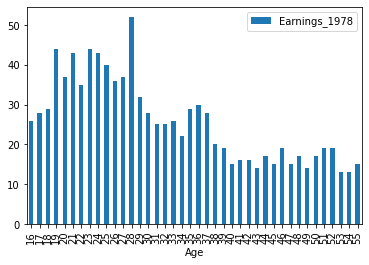

In [284]:
df3.groupby('Age').count().plot.bar()

<AxesSubplot:xlabel='Eduacation'>

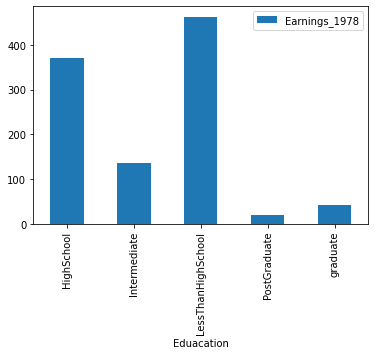

In [285]:
df3_1.groupby('Eduacation').count().plot.bar()

In [286]:
df3.describe()

,Earnings_1978,Age
count,1032.000000,1032.000000
mean,11997.540291,31.720930
std,8767.174084,10.830841
min,0.000000,16.000000
25%,3514.035000,23.000000
50%,12214.150000,29.000000
75%,19578.767500,39.000000
max,25564.670000,55.000000


array([[<AxesSubplot:title={'center':'Earnings_1978'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

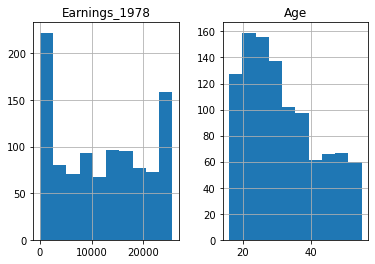

In [287]:
df3.hist()

In [288]:
df['Earnings_1978'].describe()

count    13121.000000
mean     14271.210635
std       8988.273900
min          0.000000
25%       6283.290000
50%      15233.880000
75%      22856.000000
max      25564.670000
Name: Earnings_1978, dtype: float64

In [289]:
df['Earnings_1978'].median()

15233.88

In [290]:
df['Earnings_1978'].mean()

14271.2106348592

In [357]:

df2pmf = thinkstats2.Pmf(round(df_real["Earnings_1978"],2))


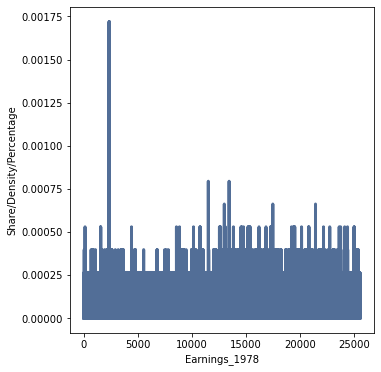

<Figure size 576x432 with 0 Axes>

In [358]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([df2pmf])
#thinkplot.Show(xlabel="Earnings_1978", ylabel = "Percentage")
thinkplot.Show(xlabel="Earnings_1978", ylabel = "Share/Density/Percentage")

In [293]:
# PMF

dfpmf = thinkstats2.Pmf(df["Age"])


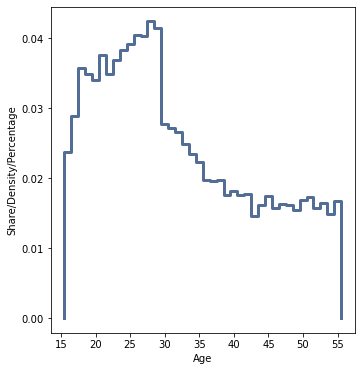

<Figure size 576x432 with 0 Axes>

In [294]:
#Graph
thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([dfpmf])
#thinkplot.Show(xlabel="Age", ylabel = "Percentage")
thinkplot.Show(xlabel="Age", ylabel = "Share/Density/Percentage")

In [295]:
#find frequency of each Age using crosstab
df_freq = pd.crosstab(index=df['Age'], columns='count')

In [296]:
df_freq.tail()

col_0,count
Age,
51,226
52,206
53,216
54,195
55,220


In [297]:
#calculating frequency table 

s = df['Age']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
freq = pd.DataFrame({'counts': counts, 'percent': percent, '%': percent100})
freq.index.name = 'Age' # renaming the index cloumn name to age
freq.head()


,counts,percent,%
Age,,,
28,556,0.042375,4.2%
29,544,0.041460,4.1%
26,531,0.040469,4.0%
27,528,0.040241,4.0%
25,513,0.039098,3.9%


In [298]:
# creating a frequency table and ensuring it's sorted

s = df['Age']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df_freq1= pd.DataFrame({'counts': counts, 'percent': percent, '%': percent100})
df_freq2 = df_freq1.sort_index () # making sure the date is sorted
df_freq2.index.name = 'Age' # renaming the index cloumn name to age
df_freq2.tail()



,counts,percent,%
Age,,,
51,226,0.017224,1.7%
52,206,0.015700,1.6%
53,216,0.016462,1.6%
54,195,0.014862,1.5%
55,220,0.016767,1.7%


In [299]:
# create a cumulative column

df_freq2["cumulative"]= df_freq2['percent'].cumsum().mul(100).round(1).astype(str) + '%'

In [300]:
df_freq2.tail() 

,counts,percent,%,cumulative
Age,,,,
51,226,0.017224,1.7%,93.6%
52,206,0.015700,1.6%,95.2%
53,216,0.016462,1.6%,96.8%
54,195,0.014862,1.5%,98.3%
55,220,0.016767,1.7%,100.0%


{'xscale': 'linear', 'yscale': 'linear'}

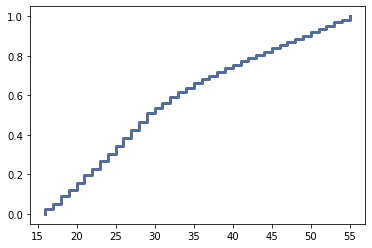

In [301]:
#Create and show CDF of Age
df_cdf = thinkstats2.Cdf(df['Age'])
thinkplot.Cdf(df_cdf)

In [302]:
df_cdf.Prob(51)
#And if we want to see in in pretty printing
print("Fraction of people that are 51 is:",str(round(df_cdf.Prob(51), 3)*100)+"%")

Fraction of people that are 51 is: 93.60000000000001%


In [303]:
df_cdf.Prob(51)
#And if we want to see in in pretty printing
print("Fraction of people that are 51 is:",str(round(df_cdf.Prob(51), 3)*100)+"%")

Fraction of people that are 51 is: 93.60000000000001%


#### What fraction of the people in the data are 51? What fraction are older than 51?

In [304]:
# using .loc and lamba for slicing is efficient
df_1 = df['Age'].loc[lambda x : x<=51]



In [305]:
df_1.head()

5834     16
13932    48
8030     19
5788     17
9186     17
Name: Age, dtype: int64

In [306]:
df_1.count()

12284

In [307]:
# using .loc and lamba for slicing is efficient
df_2 = df['Age'].loc[lambda x : x>51]


In [308]:
df_2.count()


837

In [309]:
print(df.shape, df_1.shape, df_2.shape,sep="\n")

(13121, 9)
(12284,)
(837,)


In [310]:
# %>51 in the dataset
print(">51:", df_2.shape[0]/df.shape[0])

>51: 0.06379086959835378


In [311]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,13121.000000,13121.000000,13121.000000,13121.000000,13121.000000
mean,31.937429,0.322232,13011.609867,12682.138238,14271.210635
std,10.959869,0.467349,8749.490339,8440.649578,8988.273900
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,4659.140000,4633.350000,6283.290000
50%,29.000000,0.000000,13650.210000,13269.870000,15233.880000
75%,40.000000,1.000000,20844.640000,20137.550000,22856.000000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


##### What is the median age?

In [312]:
df["Age"].median()

29.0

##### Does the distribution of the sample data seem to mirror the working age population?

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [313]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.84,2625.92
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.00,0.00
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.39,5334.59
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.56,7248.25
9186,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,4040.76,9713.10


(array([223.,  82.,  74., 100., 103., 104., 101.,  72.,  81.,  92.]),
 array([    0.   ,  2586.232,  5172.464,  7758.696, 10344.928, 12931.16 ,
        15517.392, 18103.624, 20689.856, 23276.088, 25862.32 ]),
 <BarContainer object of 10 artists>)

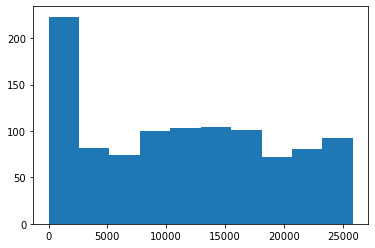

In [314]:
plt.hist(round(df2['Earnings_1974'],2), bins=10)

(array([2501., 1161.,  970., 1061., 1238., 1274., 1399., 1328., 2189.]),
 array([    0.        ,  2804.83888889,  5609.67777778,  8414.51666667,
        11219.35555556, 14024.19444444, 16829.03333333, 19633.87222222,
        22438.71111111, 25243.55      ]),
 <BarContainer object of 9 artists>)

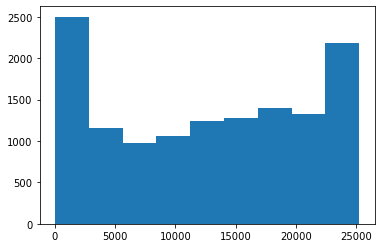

In [315]:
plt.hist(df['Earnings_1975'], bins=9)

In [316]:
df["Hisp"].value_counts()

NotHispanic    12083
hispanic        1038
Name: Hisp, dtype: int64

In [317]:
df_nhb = df[(df["Hisp"]=='NotHispanic') & (df['Race']=="NotBlack")]

In [318]:
df_nhb.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
5834,16,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,2323.84,2625.92
13932,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.0,0.00,0.00
8030,19,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.0,483.39,5334.59
5788,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,1079.56,7248.25
9186,17,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.0,4040.76,9713.10


In [319]:
df_hisp = df[df["Hisp"]=='hispanic']

In [320]:
df_hisp.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
13901,18,LessThanHighSchool,NotBlack,hispanic,NotMarried,1,0.0,3039.97,2027.44
9179,27,graduate,NotBlack,hispanic,NotMarried,0,0.0,5370.97,12237.05
10943,16,LessThanHighSchool,NotBlack,hispanic,NotMarried,1,0.0,3750.73,11770.09
5870,21,Intermediate,NotBlack,hispanic,NotMarried,0,0.0,309.73,10355.91
13813,42,LessThanHighSchool,NotBlack,hispanic,Married,1,0.0,7897.11,11526.27


In [321]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,13121.000000,13121.000000,13121.000000,13121.000000,13121.000000
mean,31.937429,0.322232,13011.609867,12682.138238,14271.210635
std,10.959869,0.467349,8749.490339,8440.649578,8988.273900
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,4659.140000,4633.350000,6283.290000
50%,29.000000,0.000000,13650.210000,13269.870000,15233.880000
75%,40.000000,1.000000,20844.640000,20137.550000,22856.000000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [322]:
df["Race"].value_counts()

NotBlack    12089
black        1032
Name: Race, dtype: int64

In [323]:
df['Eduacation'].value_counts()

HighSchool            5083
LessThanHighSchool    4228
Intermediate          2161
graduate              1022
PostGraduate           627
Name: Eduacation, dtype: int64

In [324]:
df_black = df[df['Race']=="black"]

In [325]:
df_black.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
11021,26,HighSchool,black,NotHispanic,NotMarried,0,0.0,1448.37,0.00
13922,39,LessThanHighSchool,black,NotHispanic,Married,1,0.0,0.00,964.96
8042,20,LessThanHighSchool,black,NotHispanic,NotMarried,1,0.0,3480.39,5495.66
2593,17,LessThanHighSchool,black,NotHispanic,NotMarried,1,0.0,297.19,54.68
2597,28,Intermediate,black,NotHispanic,NotMarried,0,0.0,1063.45,0.00


In [326]:
df_black["Hisp"].value_counts()

NotHispanic    1032
Name: Hisp, dtype: int64

In [327]:
df_black["Eduacation"].value_counts()

LessThanHighSchool    463
HighSchool            371
Intermediate          137
graduate               41
PostGraduate           20
Name: Eduacation, dtype: int64

In [328]:
# calculating the counts an percentage of black people with eductaion

s = df_black.Eduacation
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent, '%': percent100})


,counts,percent,%
LessThanHighSchool,463,0.448643,44.9%
HighSchool,371,0.359496,35.9%
Intermediate,137,0.132752,13.3%
graduate,41,0.039729,4.0%
PostGraduate,20,0.019380,1.9%


##### Demographic Conclusion


### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

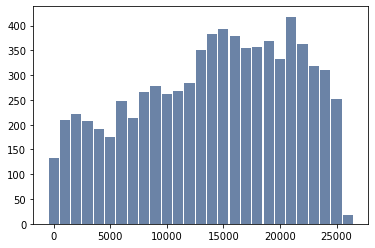

In [329]:
#Hist
histSP = thinkstats2.Hist(round(df_real["Earnings_1978"], -3))
thinkplot.Hist(histSP)
thinkplot.Config()


Race and gender still played a strong role in lifetime earnings, however. White men had higher earnings than any other group at each education level below a master’s degree, where they were out-earned only by Asian men. Moreover, workers of some racial groups got more value from higher degrees than others did. For example, while Asian, Hispanic and non-Hispanic black workers with just a high school diploma made roughly similar earnings over a 40-year career span, an Asian man with a master’s degree could expect to earn nearly $3.5 million during his career, while, with the same academic credentials, a Hispanic man would earn $2.8 million, and a non-Hispanic black woman would earn only $2.3 million during the same time frame.

The Census researchers also compared the data to previous educational attainment data and found that the overall level of education in America has risen dramatically in the past. As of 2008, 85 percent of adults ages 25 and older had at least a high school diploma, up from 24.5 percent in 1940.

However, they found those who speak English as a second language had an annual decrease in earnings, after accounting for education and other issues. Those who spoke English “very well” still saw $989 less each year compared to workers who spoke only English.

In [330]:
df_plot =  df[(df["Earnings_1978"]!=0) & (df["Earnings_1978"]<25000)]

c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Earnings_1974', ylabel='Density'>

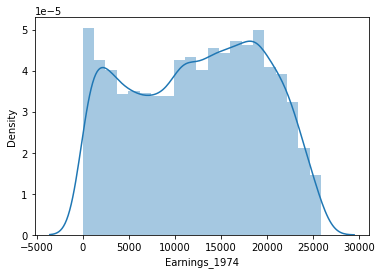

In [359]:
	
sns.distplot(df_real["Earnings_1974"])

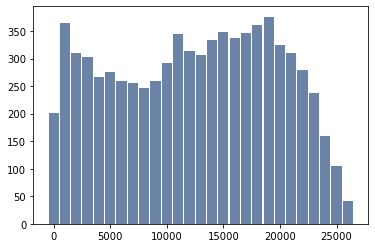

In [360]:
#Hist
histSP = thinkstats2.Hist(round(df_real["Earnings_1974"], -3))
thinkplot.Hist(histSP)
thinkplot.Config()

As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### What to Investigate Further


##### Histogram and PMF

In [333]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

##### Differences in Median Income, and Theory on Why


##### Outliers

##### Outlier Conclusions


In [334]:
# putting the years in data frame and median earning and rounding to 2 decimal places

Data = {'Year': [1974,1975,1978],
        'Earning': [round(df_black["Earnings_1974"].median(),2),round(df_black["Earnings_1975"].median(),2),round(df_black["Earnings_1978"].median(),2)]
  }

In [335]:
df_Earning_black = pd.DataFrame(Data,columns=['Year','Earning'])


In [336]:
df_Earning_black.head()

,Year,Earning
0,1974,11160.97
1,1975,10886.06
2,1978,12214.15


In [337]:
df_Earning_black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     3 non-null      int64  
 1   Earning  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [338]:
# putting the years in data frame and median earning and rounding to 2 decimal places

Data1 = {'Year': [1974,1975,1978],
        'Earning': [round(df_hisp["Earnings_1974"].median(),2),round(df_hisp["Earnings_1975"].median(),2),round(df_hisp["Earnings_1978"].median(),2)]
  }

In [339]:
df_Earning_hisp = pd.DataFrame(Data1,columns=['Year','Earning'])



In [340]:
df_Earning_hisp.head()

,Year,Earning
0,1974,12480.53
1,1975,12204.63
2,1978,13581.78


In [341]:
Data2 = {'Year': [1974,1975,1978],
        'Earning': [round(df_nhb["Earnings_1974"].median(),2),round(df_nhb["Earnings_1975"].median(),2),round(df_nhb["Earnings_1978"].median(),2)]
  }

In [342]:
df_Earning_nhb = pd.DataFrame(Data2,columns=['Year','Earning'])


In [343]:
df_Earning_nhb.head()

,Year,Earning
0,1974,14093.01
1,1975,13695.97
2,1978,15776.21


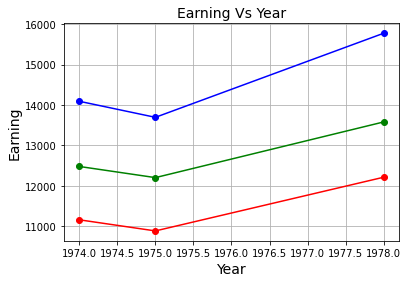

In [344]:
plt.plot(df_Earning_black['Year'], df_Earning_black['Earning'], color='red', marker='o')
plt.plot(df_Earning_hisp['Year'], df_Earning_hisp['Earning'], color='green', marker='o')
plt.plot(df_Earning_nhb['Year'], df_Earning_nhb['Earning'], color='blue', marker='o')
plt.title('Earning Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Earning', fontsize=14)

plt.grid(True)
plt.show()

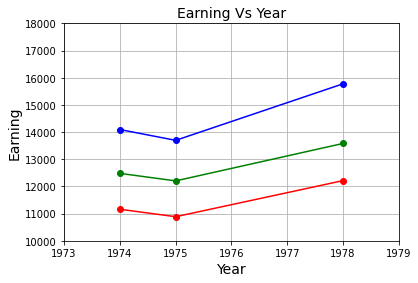

In [345]:
plt.plot(df_Earning_black['Year'], df_Earning_black['Earning'], color='red', marker='o')
plt.plot(df_Earning_hisp['Year'], df_Earning_hisp['Earning'], color='green', marker='o')
plt.plot(df_Earning_nhb['Year'], df_Earning_nhb['Earning'], color='blue', marker='o')
plt.title('Earning Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Earning', fontsize=14)
plt.axis([1973, 1979, 10000, 18000]) # setting axis scale X and Y
plt.grid(True)
plt.show()

In [346]:

df_Earning_black['Year'] = pd.to_datetime(df_Earning_black["Year"], format='%Y')

df_Earning_black = df_Earning_black.set_index('Year')


In [347]:
df_Earning_black.head()

,Earning
Year,
1974-01-01,11160.97
1975-01-01,10886.06
1978-01-01,12214.15


In [348]:
df_Earning_hisp['Year'] = pd.to_datetime(df_Earning_hisp["Year"], format='%Y')
df_Earning_hisp = df_Earning_hisp.set_index('Year')
df_Earning_hisp.head()

,Earning
Year,
1974-01-01,12480.53
1975-01-01,12204.63
1978-01-01,13581.78


In [349]:
df_Earning_nhb['Year'] = pd.to_datetime(df_Earning_nhb["Year"], format='%Y')
df_Earning_nhb = df_Earning_nhb.set_index('Year')
df_Earning_nhb.head()

,Earning
Year,
1974-01-01,14093.01
1975-01-01,13695.97
1978-01-01,15776.21


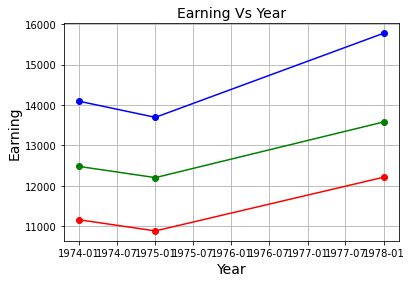

In [350]:
plt.plot(df_Earning_black['Earning'], color='red', marker='o')
plt.plot(df_Earning_hisp['Earning'], color='green', marker='o')
plt.plot(df_Earning_nhb['Earning'], color='blue', marker='o')
plt.title('Earning Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Earning', fontsize=14)
plt.grid(True)
plt.show()

In [351]:
df_Earning = df2[["Earnings_1974", "Earnings_1975", "Earnings_1978"]]

In [352]:
#find Q1, Q3, and interquartile range for each column
import scipy.stats as stats
Q1 = df_Earning.quantile(q=.25)
Q3 = df_Earning.quantile(q=.75)
IQR = df_Earning.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_Earning[~((df_Earning < (Q1-1.5*IQR)) | (df_Earning > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape


(1032, 3)